# 필요한 라이브러리 설치

In [1]:
# 필요한 라이브러리 설치
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sklearn
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
import missingno as msno
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

# 파일 불러오기 - 6class

In [7]:
# 파일 받아오기
# 6class

simple_df = pd.read_csv('Sdf.csv')
KNN_df = pd.read_csv('Kdf.csv')
MICE_df = pd.read_csv('Mdf.csv')

# 파일 불러오기 - 3class

In [8]:
'''
# 파일 받아오기
# 3class

simple_imputer = pd.read_csv('just_df_3class')
KNN_dataframes = pd.read_csv('iterative_df_3class')
MICE_dataframe = pd.read_csv('knn_df_3class')
'''

"\n# 파일 받아오기\n# 3class\n\nsimple_imputer = pd.read_csv('just_df_3class')\nKNN_dataframes = pd.read_csv('iterative_df_3class')\nMICE_dataframe = pd.read_csv('knn_df_3class')\n"

In [9]:
MICE_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.831450,0.472949,0.945033,0.000046,0.904939,0.483805,0.443752,0.002664,0.000476,0.304174,...,0.999736,0.751235,0.00018,0.013563,0.000004,0.000165,0.085542,0.000254,0.034980,0.0
1,0.831466,0.473081,0.945182,0.000044,0.904937,0.483436,0.443759,0.002658,0.000533,0.304169,...,0.999736,0.751246,0.00018,0.013563,0.000003,0.000147,0.085543,0.000211,0.035155,0.0
2,0.831536,0.473296,0.944778,0.000037,0.904936,0.483436,0.443803,0.002648,0.000493,0.304046,...,0.999736,0.751425,0.00018,0.013592,0.000004,0.000154,0.085544,0.000182,0.034972,0.0
3,0.831237,0.472870,0.945156,0.000054,0.904940,0.483578,0.443617,0.002674,0.000467,0.304217,...,0.999736,0.751120,0.00018,0.013563,0.000004,0.000151,0.085542,0.000246,0.034973,0.0
4,0.831426,0.473206,0.944705,0.000034,0.904936,0.483614,0.443698,0.002651,0.000477,0.304099,...,0.999736,0.751274,0.00018,0.013568,0.000004,0.000157,0.085543,0.000188,0.034981,0.0


In [10]:
KNN_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.831450,0.472949,0.945033,0.000046,0.904939,0.483805,0.443752,0.002664,0.000476,0.304174,...,0.999736,0.751235,0.00018,0.013563,0.000004,0.000165,0.085542,0.000254,0.034980,0.0
1,0.831466,0.473081,0.945182,0.000044,0.904937,0.483436,0.443759,0.002658,0.000533,0.304169,...,0.999736,0.751246,0.00018,0.013563,0.000003,0.000147,0.085543,0.000211,0.035155,0.0
2,0.831536,0.473296,0.944778,0.000037,0.904936,0.483436,0.443803,0.002648,0.000493,0.304046,...,0.999736,0.751425,0.00018,0.013592,0.000004,0.000154,0.085544,0.000182,0.034972,0.0
3,0.831237,0.472870,0.945156,0.000054,0.904940,0.483578,0.443617,0.002674,0.000467,0.304217,...,0.999736,0.751120,0.00018,0.013563,0.000004,0.000151,0.085542,0.000246,0.034973,0.0
4,0.831426,0.473206,0.944705,0.000034,0.904936,0.483614,0.443698,0.002651,0.000477,0.304099,...,0.999736,0.751274,0.00018,0.013568,0.000004,0.000157,0.085543,0.000188,0.034981,0.0


In [11]:
simple_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr61,attr62,attr63,attr64,bankruptcy
0,0.831450,0.472949,0.945033,0.000046,0.904939,0.483805,0.443752,0.002664,0.000476,0.304174,...,0.272218,0.999736,0.751235,0.00018,0.013563,0.000165,0.085542,0.000254,0.034980,0
1,0.831237,0.472870,0.945156,0.000054,0.904940,0.483578,0.443617,0.002674,0.000467,0.304217,...,0.230838,0.999736,0.751120,0.00018,0.013563,0.000151,0.085542,0.000246,0.034973,0
2,0.831426,0.473206,0.944705,0.000034,0.904936,0.483614,0.443698,0.002651,0.000477,0.304099,...,0.228649,0.999736,0.751274,0.00018,0.013568,0.000157,0.085543,0.000188,0.034981,0
3,0.831107,0.473226,0.944359,0.000029,0.904933,0.483436,0.443550,0.002650,0.000496,0.304087,...,0.228247,0.999736,0.751067,0.00018,0.013577,0.000156,0.085543,0.000199,0.034964,0
4,0.831042,0.472656,0.944489,0.000046,0.904934,0.483355,0.443517,0.002783,0.000452,0.304396,...,0.228419,0.999735,0.751042,0.00018,0.013563,0.000242,0.085542,0.000269,0.034958,0


# x, y 나누기

In [12]:
Mx = MICE_df.drop(labels=['bankruptcy'], axis=1)
My = MICE_df['bankruptcy'].to_frame()

In [13]:
Mx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64
0,0.831450,0.472949,0.945033,0.000046,0.904939,0.483805,0.443752,0.002664,0.000476,0.304174,...,0.272218,0.999736,0.751235,0.00018,0.013563,0.000004,0.000165,0.085542,0.000254,0.034980
1,0.831466,0.473081,0.945182,0.000044,0.904937,0.483436,0.443759,0.002658,0.000533,0.304169,...,0.228538,0.999736,0.751246,0.00018,0.013563,0.000003,0.000147,0.085543,0.000211,0.035155
2,0.831536,0.473296,0.944778,0.000037,0.904936,0.483436,0.443803,0.002648,0.000493,0.304046,...,0.229046,0.999736,0.751425,0.00018,0.013592,0.000004,0.000154,0.085544,0.000182,0.034972
3,0.831237,0.472870,0.945156,0.000054,0.904940,0.483578,0.443617,0.002674,0.000467,0.304217,...,0.230838,0.999736,0.751120,0.00018,0.013563,0.000004,0.000151,0.085542,0.000246,0.034973
4,0.831426,0.473206,0.944705,0.000034,0.904936,0.483614,0.443698,0.002651,0.000477,0.304099,...,0.228649,0.999736,0.751274,0.00018,0.013568,0.000004,0.000157,0.085543,0.000188,0.034981


In [14]:
Kx = KNN_df.drop(labels=['bankruptcy'], axis=1)
Ky = KNN_df['bankruptcy'].to_frame()

In [15]:
Kx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64
0,0.831450,0.472949,0.945033,0.000046,0.904939,0.483805,0.443752,0.002664,0.000476,0.304174,...,0.272218,0.999736,0.751235,0.00018,0.013563,0.000004,0.000165,0.085542,0.000254,0.034980
1,0.831466,0.473081,0.945182,0.000044,0.904937,0.483436,0.443759,0.002658,0.000533,0.304169,...,0.228538,0.999736,0.751246,0.00018,0.013563,0.000003,0.000147,0.085543,0.000211,0.035155
2,0.831536,0.473296,0.944778,0.000037,0.904936,0.483436,0.443803,0.002648,0.000493,0.304046,...,0.229046,0.999736,0.751425,0.00018,0.013592,0.000004,0.000154,0.085544,0.000182,0.034972
3,0.831237,0.472870,0.945156,0.000054,0.904940,0.483578,0.443617,0.002674,0.000467,0.304217,...,0.230838,0.999736,0.751120,0.00018,0.013563,0.000004,0.000151,0.085542,0.000246,0.034973
4,0.831426,0.473206,0.944705,0.000034,0.904936,0.483614,0.443698,0.002651,0.000477,0.304099,...,0.228649,0.999736,0.751274,0.00018,0.013568,0.000004,0.000157,0.085543,0.000188,0.034981


In [16]:
Sx = simple_df.drop(labels=['bankruptcy'], axis=1)
Sy = simple_df['bankruptcy'].to_frame()

In [17]:
Sx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr54,attr55,attr56,attr57,attr58,attr59,attr61,attr62,attr63,attr64
0,0.831450,0.472949,0.945033,0.000046,0.904939,0.483805,0.443752,0.002664,0.000476,0.304174,...,0.020791,0.272218,0.999736,0.751235,0.00018,0.013563,0.000165,0.085542,0.000254,0.034980
1,0.831237,0.472870,0.945156,0.000054,0.904940,0.483578,0.443617,0.002674,0.000467,0.304217,...,0.020792,0.230838,0.999736,0.751120,0.00018,0.013563,0.000151,0.085542,0.000246,0.034973
2,0.831426,0.473206,0.944705,0.000034,0.904936,0.483614,0.443698,0.002651,0.000477,0.304099,...,0.020790,0.228649,0.999736,0.751274,0.00018,0.013568,0.000157,0.085543,0.000188,0.034981
3,0.831107,0.473226,0.944359,0.000029,0.904933,0.483436,0.443550,0.002650,0.000496,0.304087,...,0.020784,0.228247,0.999736,0.751067,0.00018,0.013577,0.000156,0.085543,0.000199,0.034964
4,0.831042,0.472656,0.944489,0.000046,0.904934,0.483355,0.443517,0.002783,0.000452,0.304396,...,0.020785,0.228419,0.999735,0.751042,0.00018,0.013563,0.000242,0.085542,0.000269,0.034958


# Oversampling 진행

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

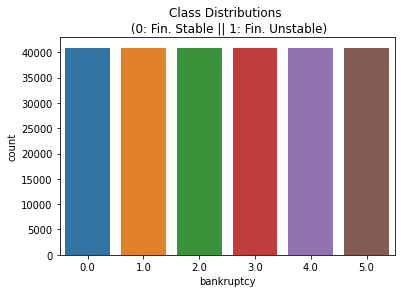

In [18]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Mdf, My = smote.fit_resample(Mx, My)

sns.countplot(x=My['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

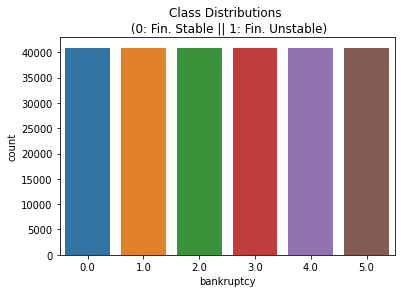

In [19]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Kdf, Ky = smote.fit_resample(Kx, Ky)

sns.countplot(x=Ky['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

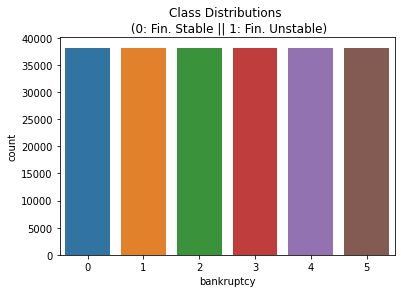

In [20]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Sdf, Sy = smote.fit_resample(Sx, Sy)

sns.countplot(x=Sy['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

# Train, Test 셋 나누기

In [21]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Mx_train, Mx_test, My_train, My_test = train_test_split(Mdf, My,test_size=0.3,random_state=2022)

In [22]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Kx_train, Kx_test, Ky_train, Ky_test = train_test_split(Kdf, Ky,test_size=0.3,random_state=2022)

In [23]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Sx_train, Sx_test, Sy_train, Sy_test = train_test_split(Sdf, Sy,test_size=0.3,random_state=2022)

# 모델 구축 ( 모델 이름 )

In [24]:
from lightgbm import LGBMClassifier

In [25]:
Mlgbm_wrapper = LGBMClassifier(n_estimators=100)


evals = [(Mx_test,My_test)]
Mlgbm_wrapper.fit(Mx_train,My_train,early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals,verbose=True)
preds = Mlgbm_wrapper.predict(Mx_test)

[1]	valid_0's multi_logloss: 1.61321
[2]	valid_0's multi_logloss: 1.49134
[3]	valid_0's multi_logloss: 1.3972
[4]	valid_0's multi_logloss: 1.31922
[5]	valid_0's multi_logloss: 1.25259
[6]	valid_0's multi_logloss: 1.195
[7]	valid_0's multi_logloss: 1.14624
[8]	valid_0's multi_logloss: 1.10269
[9]	valid_0's multi_logloss: 1.06357
[10]	valid_0's multi_logloss: 1.02769
[11]	valid_0's multi_logloss: 0.994409
[12]	valid_0's multi_logloss: 0.964564
[13]	valid_0's multi_logloss: 0.938724
[14]	valid_0's multi_logloss: 0.913292
[15]	valid_0's multi_logloss: 0.89076
[16]	valid_0's multi_logloss: 0.867747
[17]	valid_0's multi_logloss: 0.847071
[18]	valid_0's multi_logloss: 0.826702
[19]	valid_0's multi_logloss: 0.806297
[20]	valid_0's multi_logloss: 0.789228
[21]	valid_0's multi_logloss: 0.772808
[22]	valid_0's multi_logloss: 0.755669
[23]	valid_0's multi_logloss: 0.739309
[24]	valid_0's multi_logloss: 0.723954
[25]	valid_0's multi_logloss: 0.709207
[26]	valid_0's multi_logloss: 0.694928
[27]	vali

In [26]:
Klgbm_wrapper = LGBMClassifier(n_estimators=100)


evals = [(Kx_test,Ky_test)]
Klgbm_wrapper.fit(Kx_train,Ky_train,early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals,verbose=True)
preds = Klgbm_wrapper.predict(Kx_test)

[1]	valid_0's multi_logloss: 1.69339
[2]	valid_0's multi_logloss: 1.61745
[3]	valid_0's multi_logloss: 1.55496
[4]	valid_0's multi_logloss: 1.49511
[5]	valid_0's multi_logloss: 1.44594
[6]	valid_0's multi_logloss: 1.39979
[7]	valid_0's multi_logloss: 1.35862
[8]	valid_0's multi_logloss: 1.32082
[9]	valid_0's multi_logloss: 1.28475
[10]	valid_0's multi_logloss: 1.24994
[11]	valid_0's multi_logloss: 1.21986
[12]	valid_0's multi_logloss: 1.19241
[13]	valid_0's multi_logloss: 1.16485
[14]	valid_0's multi_logloss: 1.13723
[15]	valid_0's multi_logloss: 1.11351
[16]	valid_0's multi_logloss: 1.09032
[17]	valid_0's multi_logloss: 1.06704
[18]	valid_0's multi_logloss: 1.0459
[19]	valid_0's multi_logloss: 1.02331
[20]	valid_0's multi_logloss: 1.00205
[21]	valid_0's multi_logloss: 0.984489
[22]	valid_0's multi_logloss: 0.963677
[23]	valid_0's multi_logloss: 0.94605
[24]	valid_0's multi_logloss: 0.92759
[25]	valid_0's multi_logloss: 0.909532
[26]	valid_0's multi_logloss: 0.894776
[27]	valid_0's mul

In [27]:
Slgbm_wrapper = LGBMClassifier(n_estimators=100)


evals = [(Sx_test,Sy_test)]
Slgbm_wrapper.fit(Sx_train,Sy_train,early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals,verbose=True)
preds = Slgbm_wrapper.predict(Sx_test)

[1]	valid_0's multi_logloss: 1.71773
[2]	valid_0's multi_logloss: 1.65599
[3]	valid_0's multi_logloss: 1.60552
[4]	valid_0's multi_logloss: 1.55998
[5]	valid_0's multi_logloss: 1.51831
[6]	valid_0's multi_logloss: 1.48237
[7]	valid_0's multi_logloss: 1.44906
[8]	valid_0's multi_logloss: 1.41866
[9]	valid_0's multi_logloss: 1.38928
[10]	valid_0's multi_logloss: 1.36308
[11]	valid_0's multi_logloss: 1.33854
[12]	valid_0's multi_logloss: 1.31539
[13]	valid_0's multi_logloss: 1.29342
[14]	valid_0's multi_logloss: 1.27117
[15]	valid_0's multi_logloss: 1.24945
[16]	valid_0's multi_logloss: 1.22906
[17]	valid_0's multi_logloss: 1.20859
[18]	valid_0's multi_logloss: 1.19029
[19]	valid_0's multi_logloss: 1.17193
[20]	valid_0's multi_logloss: 1.15376
[21]	valid_0's multi_logloss: 1.13642
[22]	valid_0's multi_logloss: 1.11988
[23]	valid_0's multi_logloss: 1.10452
[24]	valid_0's multi_logloss: 1.08886
[25]	valid_0's multi_logloss: 1.07563
[26]	valid_0's multi_logloss: 1.06059
[27]	valid_0's multi_

# 모델 예측

In [28]:
My_pred=Mlgbm_wrapper.predict(Mx_test)

In [29]:
Ky_pred=Klgbm_wrapper.predict(Kx_test)

In [30]:
Sy_pred=Slgbm_wrapper.predict(Sx_test)

# 예측 정확도 확인

In [31]:
print("훈련 세트 정확도: {:.3f}".format(Mlgbm_wrapper.score(Mx_train, My_train)))
print("테스트 세트 정확도: {:.3f}".format(Mlgbm_wrapper.score(Mx_test, My_test)))

훈련 세트 정확도: 0.981
테스트 세트 정확도: 0.973


In [32]:
print("훈련 세트 정확도: {:.3f}".format(Klgbm_wrapper.score(Kx_train, Ky_train)))
print("테스트 세트 정확도: {:.3f}".format(Klgbm_wrapper.score(Kx_test, Ky_test)))

훈련 세트 정확도: 0.968
테스트 세트 정확도: 0.958


In [33]:
print("훈련 세트 정확도: {:.3f}".format(Slgbm_wrapper.score(Sx_train, Sy_train)))
print("테스트 세트 정확도: {:.3f}".format(Slgbm_wrapper.score(Sx_test, Sy_test)))

훈련 세트 정확도: 0.934
테스트 세트 정확도: 0.920


# 성능 지표 확인 ( + Confusion Matrix )

In [34]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(MX_train, My_train), '\n')
#print("Test_Accuracy : ", model.score(MX_test, My_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(My_test, My_pred)
recall = mt.recall_score(My_test, My_pred,average='micro')
precision = mt.precision_score(My_test, My_pred,average='micro')
f1_score = mt.f1_score(My_test, My_pred,average='micro')
matrix = mt.confusion_matrix(My_test, My_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.97 

Recall:  0.97 

Precision:  0.97 

F1_score:  0.97 

Confusion Matrix: 
 [[12142    99    91    57    26    14]
 [   57 12005   154    48     9     5]
 [  101   149 11835   182    63    11]
 [   68   145   225 11735    93     8]
 [   40    33    72   116 11708    26]
 [   12     8     6    18    59 12220]]


In [35]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(KX_train, Ky_train), '\n')
#print("Test_Accuracy : ", model.score(KX_test, Ky_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Ky_test, Ky_pred)
recall = mt.recall_score(Ky_test, Ky_pred,average='micro')
precision = mt.precision_score(Ky_test, Ky_pred,average='micro')
f1_score = mt.f1_score(Ky_test, Ky_pred,average='micro')
matrix = mt.confusion_matrix(Ky_test, Ky_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.96 

Recall:  0.96 

Precision:  0.96 

F1_score:  0.96 

Confusion Matrix: 
 [[11868   160   111   145    65    80]
 [   83 11849    98    94    78    76]
 [  111   205 11475   174   147   229]
 [   94   159   111 11566   127   217]
 [   95    71    61    50 11531   187]
 [   24     9     8     8    19 12255]]


In [36]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(SX_train, Sy_train), '\n')
#print("Test_Accuracy : ", model.score(SX_test, Sy_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Sy_test, Sy_pred)
recall = mt.recall_score(Sy_test, Sy_pred,average='micro')
precision = mt.precision_score(Sy_test, Sy_pred,average='micro')
f1_score = mt.f1_score(Sy_test, Sy_pred,average='micro')
matrix = mt.confusion_matrix(Sy_test, Sy_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.92 

Recall:  0.92 

Precision:  0.92 

F1_score:  0.92 

Confusion Matrix: 
 [[10750   206   158   149   134   163]
 [   70 10798   184    86   133   146]
 [  175   388 10015   287   330   301]
 [  150   230   325  9959   311   406]
 [  113   166   157   179 10473   379]
 [   31    18    36    28    32 11226]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

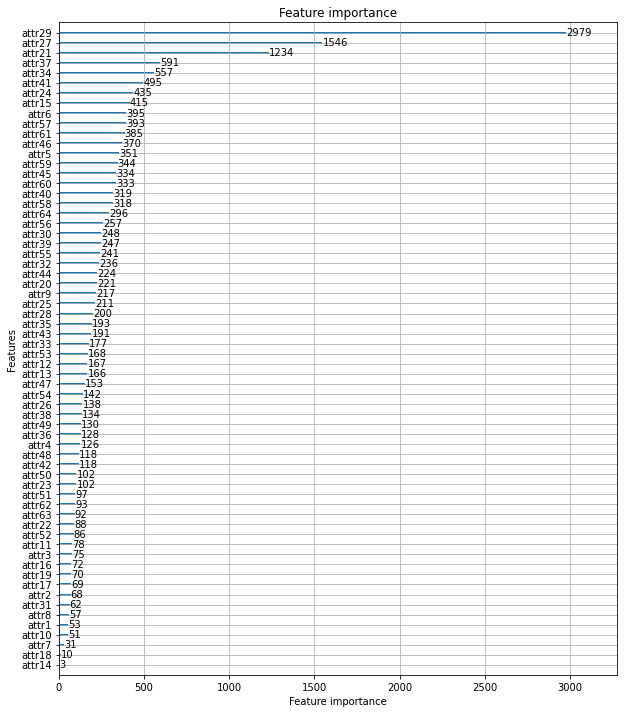

In [37]:
from lightgbm import plot_importance

fig, ax =plt.subplots(figsize=(10,12))
plot_importance(Mlgbm_wrapper,ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

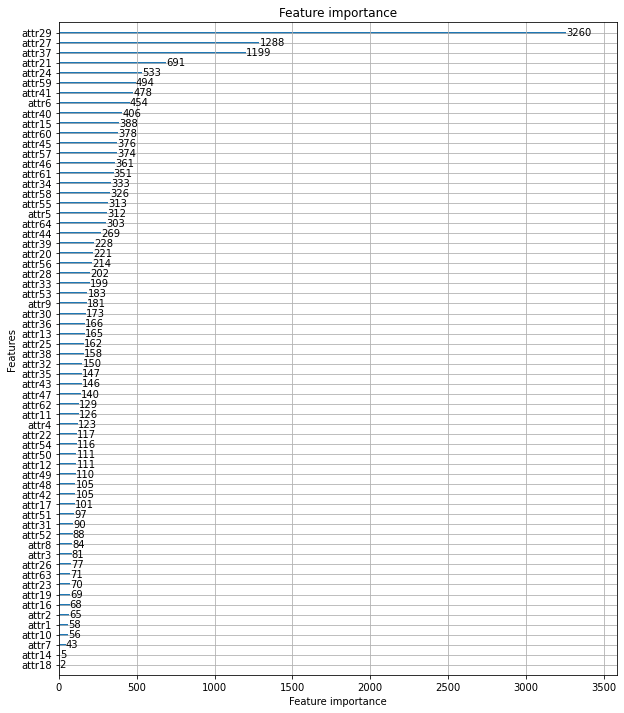

In [38]:
from lightgbm import plot_importance

fig, ax =plt.subplots(figsize=(10,12))
plot_importance(Klgbm_wrapper,ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

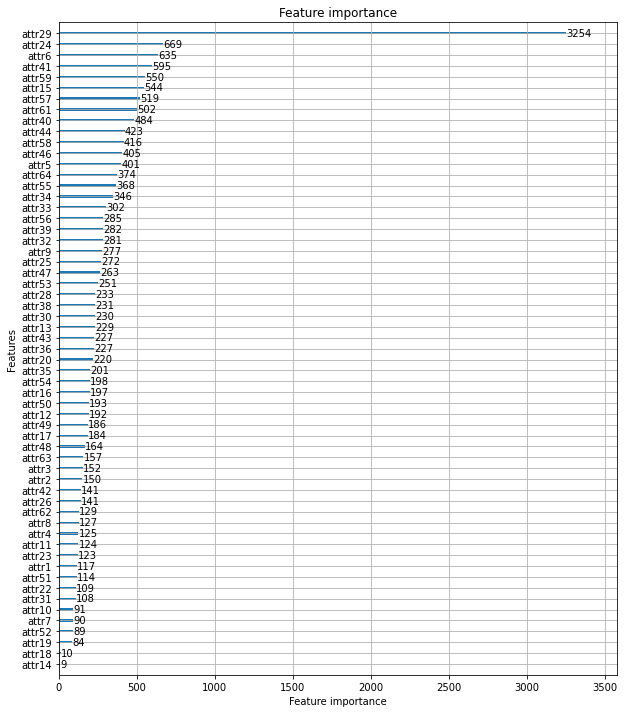

In [39]:
from lightgbm import plot_importance

fig, ax =plt.subplots(figsize=(10,12))
plot_importance(Slgbm_wrapper,ax=ax)